In [2]:
import matplotlib.pyplot as plt
# xcube_sh imports
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig
from xcube_sh.observers import Observers
from xcube_sh.viewer import ViewerServer

# xcube imports
from xcube.core.maskset import MaskSet
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry

# Various utilities
import json
import xarray as xr
import shapely.geometry
import IPython.display
import zarr

In [3]:
from edc import print_info
print_info("sh-xcube-datasets")


***Notebook Title***  
Sentinel Hub datasets using XCUBE

***Notebook Description***  
Euro Data Cube Sentinel Hub - datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC Sentinel Hub


In [4]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


## EDC Sentinel Hub - using xcube to access different data sets in Sentinel Hub

This notebook shows how to access different data sets through the Sentinel Hub API:

1. Access **Sentiel-2 L2A** through xcube Sentinel hub Store
2. Access **Sentiel-2 L1C** through xcube Sentinel hub Store
3. Access **Sentiel-1 GRD** through xcube Sentinel hub Store
4. Access **DEM** through xcube Sentinel hub Store
5. Access to a **custom data set** ingested into Sentinel Hub via [**BYOD**](https://www.sentinel-hub.com/bring-your-own-data) mechanism

In [5]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import IPython.display
import shapely.geometry
import xarray as xr
import numpy as np

In [6]:
x1 = 11.9 # degree long
y1 = 44.45  # degree lat
x2 = 13.9  # degree long
y2 = 45.9  # degree lat


coords = x1, y1, x2, y2

In [7]:
IPython.display.GeoJSON(shapely.geometry.box(*coords).__geo_interface__)

<IPython.display.GeoJSON object>

In [8]:
SH = SentinelHub()
SH.dataset_names

['LETML2',
 'S1GRD',
 'LTML2',
 'MODIS',
 'LMSSL1',
 'LOTL1',
 'DEM',
 'S3OLCI',
 'LTML1',
 'LOTL2',
 'S2L1C',
 'S3SLSTR',
 'LETML1',
 'S2L2A',
 'S5PL2',
 'CUSTOM']

## Sentinel-5P L2

In [9]:
SH.band_names('S5PL2')

['O3',
 'NO2',
 'SO2',
 'CO',
 'CH4',
 'HCHO',
 'AER_AI_340_380',
 'AER_AI_354_388',
 'CLOUD_FRACTION',
 'CLOUD_BASE_HEIGHT',
 'CLOUD_BASE_PRESSURE',
 'CLOUD_OPTICAL_THICKNESS',
 'CLOUD_TOP_HEIGHT',
 'CLOUD_TOP_PRESSURE']

In [10]:
cube_config = CubeConfig(dataset_name='S5PL2',
                         band_names=['NO2'],
                         tile_size=[512, 512],
                         bbox=coords,
                         spatial_res=0.00018,   # = 20.038 meters in degree,
                         time_range=['2017-01-01', '2020-01-01'],
                         time_period='30D')  

In [11]:
request_collector = Observers.request_collector()

In [12]:
cube = open_cube(cube_config, observer=request_collector)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 8192, lon: 11264, time: 37)
Coordinates:
  * lat        (lat) float64 45.92 45.92 45.92 45.92 ... 44.45 44.45 44.45 44.45
  * lon        (lon) float64 11.9 11.9 11.9 11.9 ... 13.93 13.93 13.93 13.93
  * time       (time) datetime64[ns] 2017-01-16 2017-02-15 ... 2020-01-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(37, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    NO2        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2021-06-27T12:00:48.572690
    time_coverage_start:       2017-01-01T00:00:00+00:00
    time_coverage_end:         2020-01-16T00:00:00+00:00
    time_coverage_duration:    P1110DT0H0M0S
    time_coverage_resolution:  P30DT0H0M0S
    geospatial_lon_min:        11.9
    geospatial_lat_min:        44.45
    geospatial_lon_max:        13.927520000000001
    geospatial_lat_max:        45.92456

In [13]:
request_collector.stats

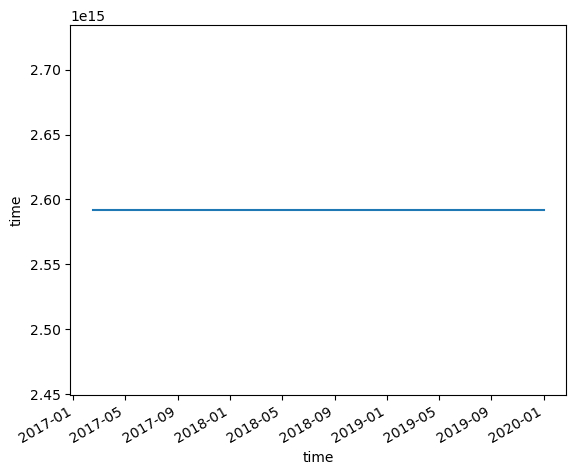

In [14]:
cube.time.diff(dim='time').plot.line()
plt.show()

In [15]:
cube.NO2

,Array,Chunk
Bytes,12.72 GiB,1.00 MiB
Shape,"(37, 8192, 11264)","(1, 512, 512)"
Count,13025 Tasks,13024 Chunks
Type,float32,numpy.ndarray


In [16]:
# for entry in cube.NO2:
#     print(
#         {
#             "date": str(entry.time.values),
#             "max": entry.values.max(),
#             "mean": entry.values.mean(),
#             "min": entry.values.min(),
#             "stDev": np.std(entry.values),
#         }
#     )

In [17]:
# Plot the bounding box on a map

field = {
    "type": "Polygon",
        "coordinates": [
          [
            [
              11.9,
              44.45
            ],
            [
              11.9,
              45.9
            ],
            [
                13.9,
                45.9
            ],
            [
                13.9,
                44.45
            ],
            [
                11.9,
                44.45
            ]
          ]
        ]}



IPython.display.GeoJSON(field)

<IPython.display.GeoJSON object>

In [19]:
nab_no2 = mask_dataset_by_geometry(cube, geometry=field)

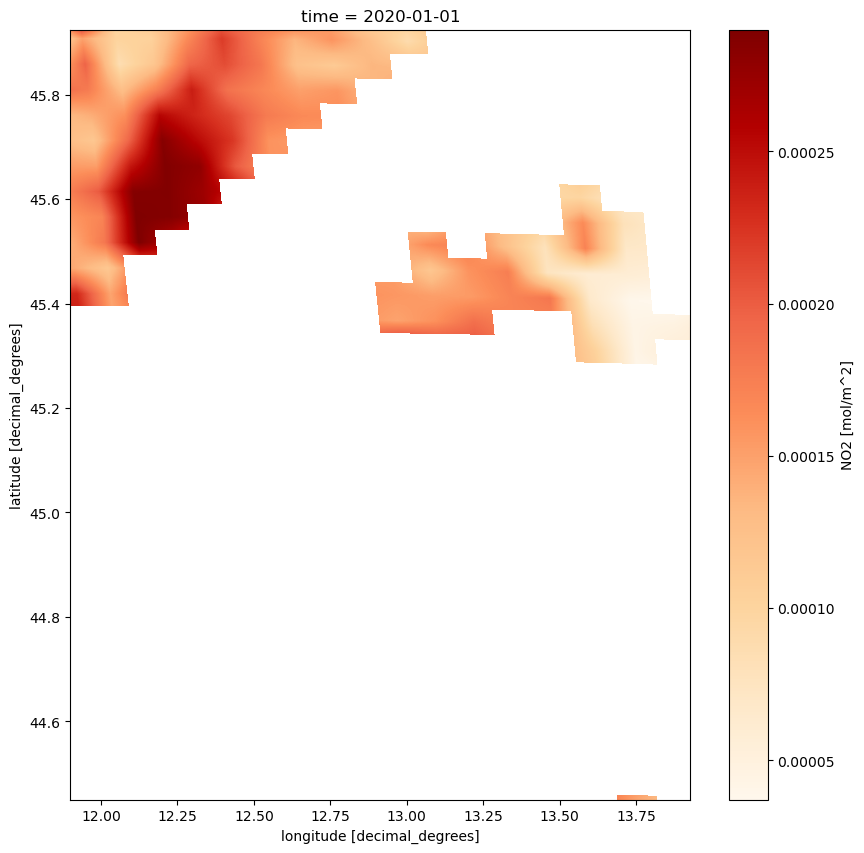

In [17]:
cube.NO2.isel(time=36).plot.imshow(cmap='OrRd', figsize=(10, 10))
plt.show()

In [ ]:
# calculate the mean no2 for each time step
timeseries_NO2 = nab_no2.NO2.mean(axis=(1,2), skipna=True)

# remove any observations with no data
timeseries_NO2 = timeseries_NO2.where(timeseries_NO2 !=0).dropna("time")

# return the new data cube chunk
timeseries_NO2

In [ ]:
# Plot VV_dB timeseries
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(timeseries_NO2.time, timeseries_NO2, color="blue", marker="o", linewidth=0.5)
ax.set_title("NO2 levels from jan 2017 - Dec 2020")
ax.set_xlabel('Time')
ax.set_ylabel('NO2')
plt.show()

### OMI NASA Dataset

In [15]:
from pydap.client import open_url
from pydap.cas.urs import setup_session
dataset_url = 'https://acdisc.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FILENAME=%2Fdata%2FAura_OMI_Level2G%2FOMNO2G.003%2F2004%2FOMI-Aura_L2G-OMNO2G_2004m1001_v003-2019m1120t191310.he5&FORMAT=bmM0Lw&BBOX=-90%2C-180%2C90%2C180&TIME=2004-10-01T00%3A00%3A00%2F2004-10-01T23%3A59%3A59&LABEL=OMI-Aura_L2G-OMNO2G_2004m1001_v003-2019m1120t191310.SUB.nc4&FLAGS=GRIDTYPE__GRID&SHORTNAME=OMNO2G&SERVICE=SUBSET_LEVEL2&VERSION=1.02&DATASET_VERSION=003&VARIABLES=..2FHDFEOS..2FGRIDS..2FColumnAmountNO2..2FData..20Fields..2FColumnAmountNO2'
session = setup_session('davidvonhuth', 'tha7Quee', check_url=dataset_url)
dataset = open_url(dataset_url, session=session)

KeyboardInterrupt: 